In [9]:
import iris
import iris.plot as iplt

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
%matplotlib inline

In [12]:
infile = '/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historical/yr/ocean/r1i1p1/wfo/latest/dedrifted/wfo-zonal-sum_Oyr_NorESM1-M_historical_r1i1p1_cumsum-all.nc'

In [13]:
cube = iris.load_cube(infile)

In [14]:
cube

<iris 'Cube' of water_flux_into_sea_water / (kg) (time: 156; latitude: 96)>

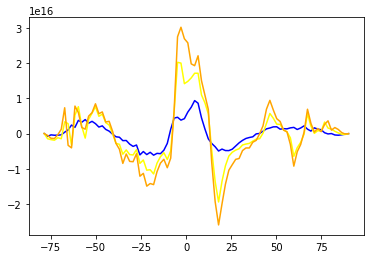

In [19]:
iplt.plot(cube[0, :], color='Blue')
iplt.plot(cube[50, :], color='Yellow')
iplt.plot(cube[100, :], color='Orange')

In [20]:
def calc_anomaly(cube):
    """Calculate the anomaly."""
    
    anomaly = cube.copy()
    anomaly.data = anomaly.data - anomaly.data[0]
    anomaly = anomaly[-1, ::]
    anomaly.remove_coord('time')
    
    return anomaly

In [ ]:
wfo_cube = iris.load_cube(wfo_file)
so_cube = iris.load_cube(so_file)

wfo_anomaly = calc_anomaly(wfo_cube)
so_anomaly = calc_anomaly(so_cube)

ocean_convergence = so_anomaly - wfo_anomaly
transport_inferred = ocean_convergence.copy()
trainsport_inferred.data = numpy.ma.cumsum(-1 * ocean_convergence.data)

iplt.plot(wfo_anomaly, color='orange', label='wfo')
iplt.plot(so_anomaly, color='blue', label='wfo')

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
#ax.yaxis.major.formatter._useMathText = True